Best k: 7.0 with accuracy: 0.9180
Worst k: 215.0 with accuracy: 0.5246


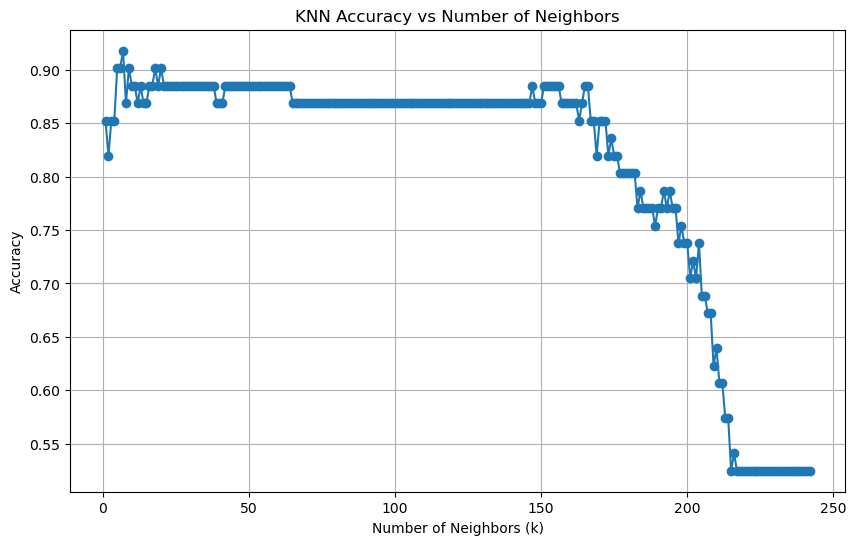

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\k230071\Desktop\excel\dataset.csv")
X = df.drop(columns=['target'])  
y = df['target']
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_train_samples = len(X_train)
accuracies = []
neighbors_range = range(1, min(251, n_train_samples + 1))  
for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

accuracy_df = pd.DataFrame({
    'k': neighbors_range,
    'accuracy': accuracies
})

best_k = accuracy_df.loc[accuracy_df['accuracy'].idxmax()]
worst_k = accuracy_df.loc[accuracy_df['accuracy'].idxmin()]
print(f"Best k: {best_k['k']} with accuracy: {best_k['accuracy']:.4f}")
print(f"Worst k: {worst_k['k']} with accuracy: {worst_k['accuracy']:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(accuracy_df['k'], accuracy_df['accuracy'], marker='o')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
